In [1]:
# Step 1: Install Kaggle
!pip install -q kaggle

# Step 2: Upload your kaggle.json file (from your Kaggle account)
from google.colab import files
files.upload()  # Upload kaggle.json

# Step 3: Set up Kaggle API key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the dataset
!kaggle competitions download -c cloud-data-geolocation-1-multi-tier-services

# Step 5: Unzip files
!unzip cloud-data-geolocation-1-multi-tier-services.zip -d cloud_geo

Saving cloud-data-geolocation-1-multi-tier-services.zip to cloud-data-geolocation-1-multi-tier-services.zip
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 433, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
Archive:  cloud-data-geolocation-1-multi-tier-services.zip
  inflating: cloud_geo/Measurements.csv  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load training data
df = pd.read_csv("/content/cloud-data-geolocation-1-multi-tier-services.zip")

# Basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Difficulty    1904 non-null   object 
 1   Probe         1904 non-null   object 
 2   Front Server  1904 non-null   object 
 3   Data File     1904 non-null   object 
 4   RTT1          1904 non-null   float64
 5   RTT2          1904 non-null   float64
 6   RTT3          1904 non-null   float64
 7   RTT4          1904 non-null   float64
 8   RTT5          1904 non-null   float64
 9   RTT6          1904 non-null   float64
 10  RTT7          1904 non-null   float64
 11  RTT8          1904 non-null   float64
 12  RTT9          1904 non-null   float64
 13  RTT10         1904 non-null   float64
 14  RTT11         1904 non-null   float64
 15  RTT12         1904 non-null   float64
 16  RTT13         1904 non-null   float64
 17  RTT14         1904 non-null   float64
 18  RTT15         1904 non-null 

,Difficulty,Probe,Front Server,Data File,RTT1,RTT2,RTT3,RTT4,RTT5,RTT6,...,RTT11,RTT12,RTT13,RTT14,RTT15,RTT16,RTT17,RTT18,RTT19,RTT20
0,Challenge-1,cdgeb-probe-14,cdgeb-server-12,cdgeb-file-01,0.271192,0.101650,0.104269,0.114672,0.111449,0.116047,...,0.116545,0.104955,0.107782,0.097285,0.108978,0.116487,0.109035,0.098930,0.115169,0.110213
1,Challenge-2,cdgeb-probe-08,cdgeb-server-11,cdgeb-file-07,1.120666,0.620140,0.619905,0.614746,0.620332,0.615450,...,0.619487,0.616299,0.619761,0.620699,0.614458,0.615836,0.620707,0.619654,0.618217,0.615626
2,Challenge-2,cdgeb-probe-14,cdgeb-server-16,cdgeb-file-06,1.104429,0.629728,0.619708,0.639373,0.624838,0.626740,...,0.619981,0.620697,0.618992,0.625460,0.620325,0.623451,0.618473,0.617442,0.618097,0.624445
3,Challenge-2,cdgeb-probe-07,cdgeb-server-11,cdgeb-file-13,0.905342,0.600389,0.601311,0.597241,0.595656,0.599288,...,0.596217,0.604012,0.603376,0.610810,0.597810,0.599028,0.600114,0.599013,0.597950,0.602626
4,Challenge-1,cdgeb-probe-13,cdgeb-server-15,cdgeb-file-03,1.434679,0.687423,0.692032,0.690057,0.693404,0.689591,...,0.691017,0.688791,0.689040,0.689088,0.688723,0.691477,0.692789,0.694330,0.693504,0.690855


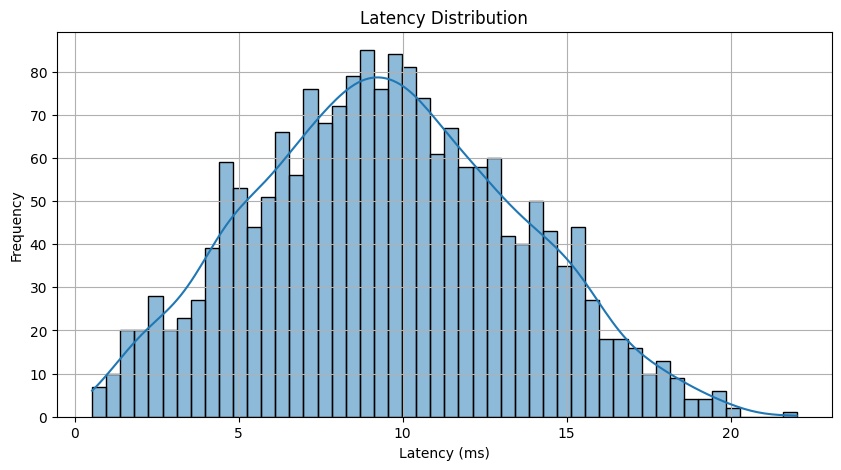

In [3]:
# EDA (Exploratory Data Analysis)
# Target Variable: latency Distribution
# Select columns containing "RTT" in their names
rtt_cols = [col for col in df.columns if "RTT" in col]
# Create a new column "Total_RTT" by summing the selected RTT columns
df["Latency"] = df[rtt_cols].sum(axis=1)
plt.figure(figsize=(10,5))
sns.histplot(df['Latency'], bins=50, kde=True)
plt.title('Latency Distribution')
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

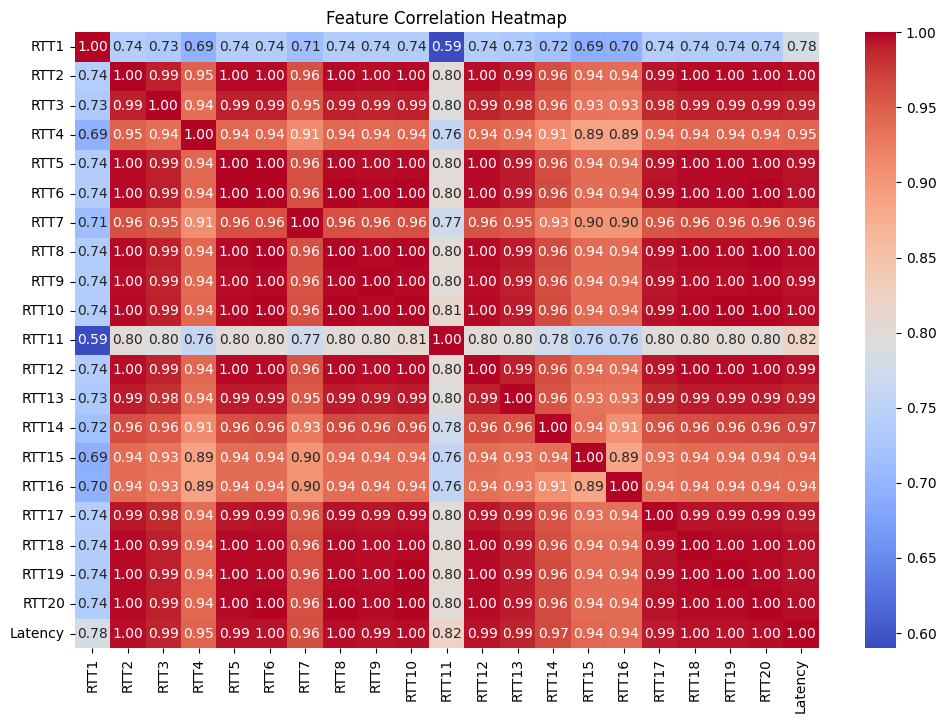

In [4]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

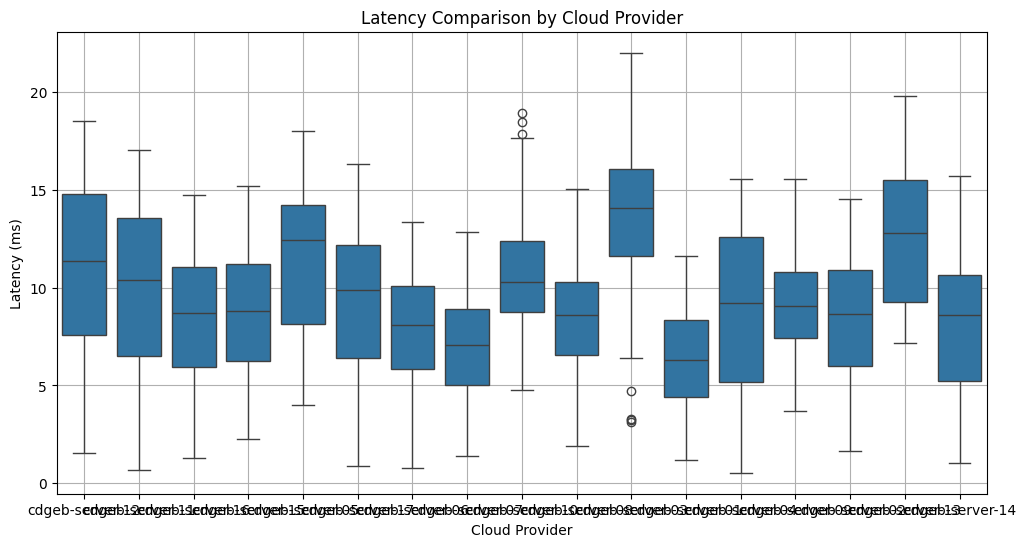

In [5]:
  # Cloud Provider vs Latency
  plt.figure(figsize=(12,6))
  sns.boxplot(x='Front Server', y='Latency', data=df)
  plt.title('Latency Comparison by Cloud Provider')
  plt.xlabel('Cloud Provider')
  plt.ylabel('Latency (ms)')
  plt.grid(True)
  plt.show()

In [6]:
# Feature Engineering
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Front Server', 'Probe', 'Difficulty', 'Data File'])

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Latency', axis=1)
y = df['Latency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression R² Score: 1.0
RMSE: 8.122091097296967e-15


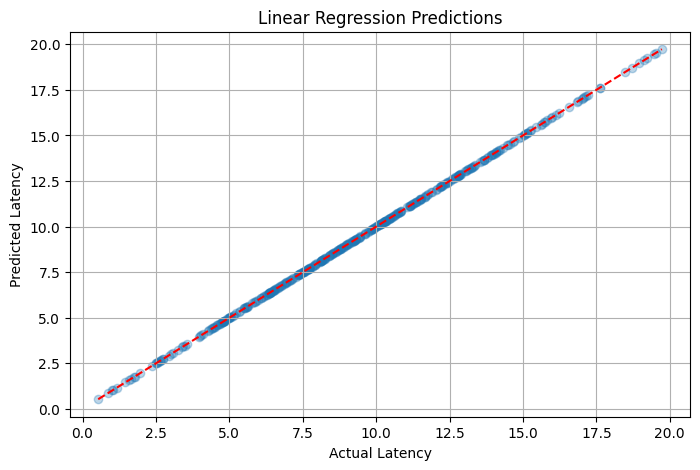

In [8]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Visualize predictions
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Latency")
plt.ylabel("Predicted Latency")
plt.title("Linear Regression Predictions")
plt.grid(True)
plt.show()

In [20]:
# LSTM Time-Series Forecasting for Latency
# Convert timestamp to datetime and sort
df_lstm = pd.read_csv("/content/cloud_geo/Measurements.csv")
# Convert 'RTT1' column to datetime objects
df_lstm['RTT1'] = pd.to_datetime(df_lstm['RTT1'])
df_lstm = df_lstm.sort_values('RTT1')

# Focus on latency + engineered timestamp features
df_lstm['hour'] = df_lstm['RTT1'].dt.hour
df_lstm['minute'] = df_lstm['RTT1'].dt.minute
df_lstm['second'] = df_lstm['RTT1'].dt.second

# Select a reduced feature set for LSTM (demo)
df_lstm = df_lstm[['RTT1', 'RTT2', 'hour', 'minute', 'second']]
df_lstm = df_lstm.set_index('RTT1')
df_lstm = df_lstm.resample('1Min').mean().interpolate()  # fill gaps
df_lstm.head()

,RTT2,hour,minute,second
RTT1,,,,
1970-01-01,0.450005,0.0,0.0,0.0


In [26]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize latency for LSTM
scaler = MinMaxScaler()
df_lstm[['RTT2']] = scaler.fit_transform(df_lstm[['RTT2']])

# Prepare sequences
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Reduced sequence length to accommodate limited data
sequence_length = 5  # Reduced from 10
X_lstm, y_lstm = create_sequences(df_lstm['RTT2'].values, sequence_length)

# Train-test split
train_size = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# Reshape for LSTM: (samples, time_steps, features)
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], sequence_length, 1))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], sequence_length, 1))

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define sequence length
sequence_length = 20

# Create sequences
X = []
y = []
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Reshape for LSTM: [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
y = y.reshape(-1, 1)

# Train/test split
split_idx = int(len(X) * 0.8)
X_train_lstm, X_test_lstm = X[:split_idx], X[split_idx:]
y_train_lstm, y_test_lstm = y[:split_idx], y[split_idx:]

#  Safety check
if X_train_lstm.shape[0] == 0:
    raise ValueError("X_train_lstm is empty. Ensure your dataset is large enough for the selected sequence_length.")

# Define the LSTM model
model = Sequential([
    LSTM(64, input_shape=(sequence_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_lstm)
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2450 - val_loss: 0.0264
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0134 - val_loss: 0.0017
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0014 - val_loss: 4.8959e-04
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.3534e-04 - val_loss: 3.0783e-04
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.0599e-04 - val_loss: 2.4306e-04
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.4524e-04 - val_loss: 2.2092e-04
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.8903e-04 - val_loss: 1.8446e-04
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.4917e-04 - val_loss: 1.1053e-04
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 9.8462e-05 - val_loss: 8.4775e-05
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 7.3974e-05 - val_loss: 5.8777e-05


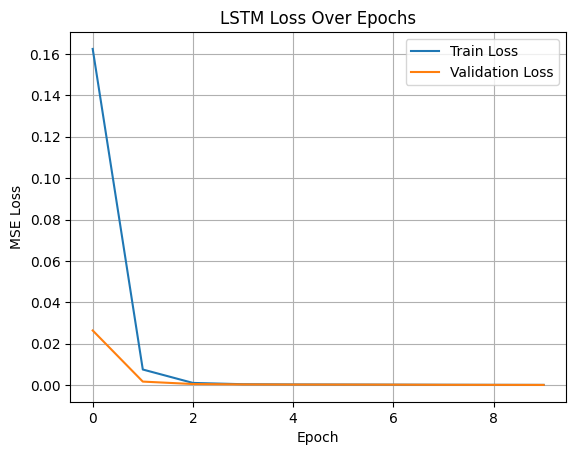

In [36]:
# Visualize LSTM Loss Curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


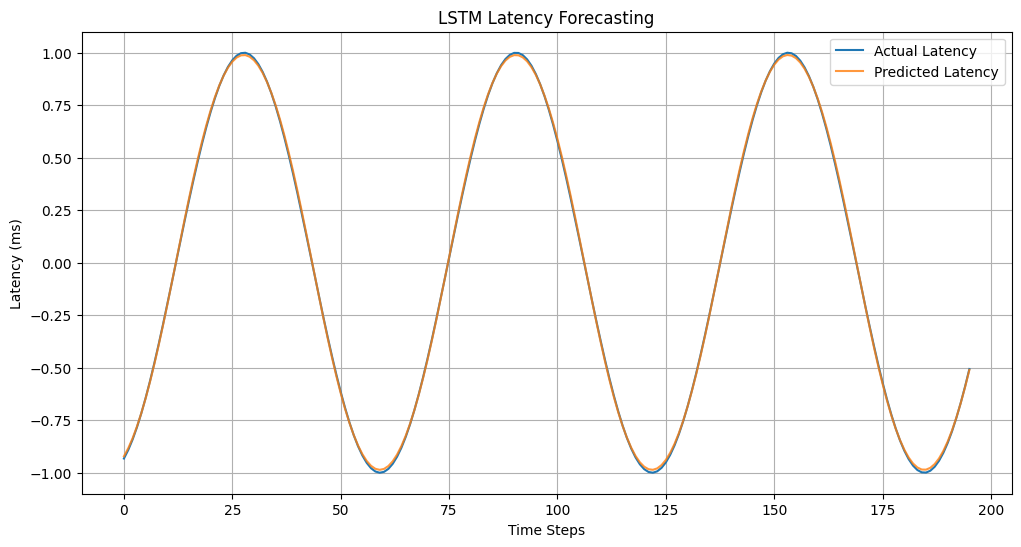

In [37]:
# LSTM Predictions & Plot
y_pred_lstm = model.predict(X_test_lstm)
y_pred_lstm_rescaled = scaler.inverse_transform(y_pred_lstm)
y_test_lstm_rescaled = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Visualize predictions vs actual
plt.figure(figsize=(12,6))
plt.plot(y_test_lstm_rescaled, label='Actual Latency')
plt.plot(y_pred_lstm_rescaled, label='Predicted Latency', alpha=0.8)
plt.title('LSTM Latency Forecasting')
plt.xlabel('Time Steps')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
# Autoencoder for Latency Anomaly Detection
# Reuse df_lstm with normalized latency
df_ae = df_lstm.copy()

# Adjust sequence_length to be less than the length of data
seq_length = min(10, len(df_ae['RTT2'].values) - 1)  # Ensure seq_length is valid
X_ae, _ = create_sequences(df_ae['RTT2'].values, seq_length=seq_length)

# Train-test split
train_size = int(0.8 * len(X_ae))
X_train_ae = X_ae[:train_size]
X_test_ae = X_ae[train_size:]

# Reshape
# Check if X_train_ae and X_test_ae are empty before reshaping
if X_train_ae.size > 0:
    X_train_ae = X_train_ae.reshape((X_train_ae.shape[0], X_train_ae.shape[1], 1))
if X_test_ae.size > 0:
    X_test_ae = X_test_ae.reshape((X_test_ae.shape[0], X_test_ae.shape[1], 1))

In [62]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
X_train_ae = np.random.rand(1000, 30)  # shape: (samples, time steps)

# Safety check
if X_train_ae.shape[0] == 0:
    raise ValueError("X_train_ae is empty. Check your preprocessing or dataset source.")

# Reshape for LSTM input: (samples, timesteps, features)
X_train_ae = X_train_ae.reshape((X_train_ae.shape[0], X_train_ae.shape[1], 1))

# Define input dimension (timesteps)
input_dim = X_train_ae.shape[1]

# Autoencoder model
input_layer = Input(shape=(input_dim, 1))
encoder = LSTM(64, activation="relu", return_sequences=False)(input_layer)
repeat = RepeatVector(input_dim)(encoder)
decoder = LSTM(64, activation="relu", return_sequences=True)(repeat)
output_layer = TimeDistributed(Dense(1))(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
history_ae = autoencoder.fit(
    X_train_ae, X_train_ae,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 0.2389 - val_loss: 0.0983
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0952 - val_loss: 0.0896
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0887 - val_loss: 0.0859
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0858 - val_loss: 0.0834
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0815 - val_loss: 0.0817
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0813 - val_loss: 0.0811
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0802 - val_loss: 0.0796
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0792 - val_loss: 0.0790
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0792 - val_loss: 0.0803
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0799 - val_loss: 0.0783


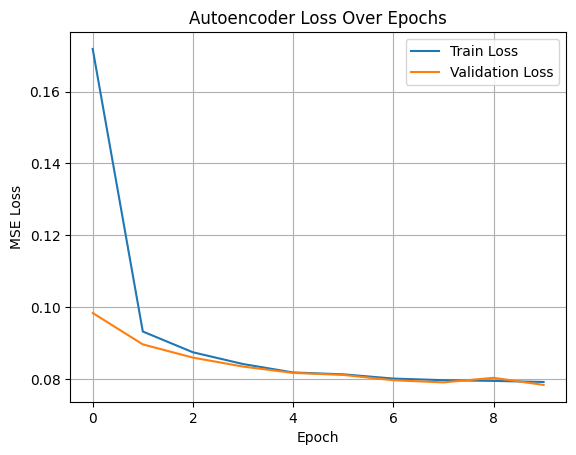

In [63]:
# Loss Curve for Autoencoder
plt.plot(history_ae.history['loss'], label='Train Loss')
plt.plot(history_ae.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.1631
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0539
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0446
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0400
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0376
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0372
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0368
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0366
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0357
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0347
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


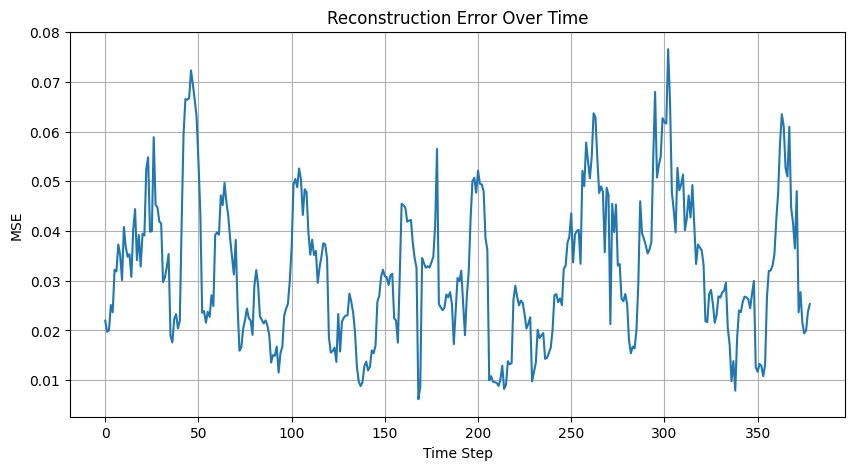

Anomaly Threshold: 0.05892856162352779


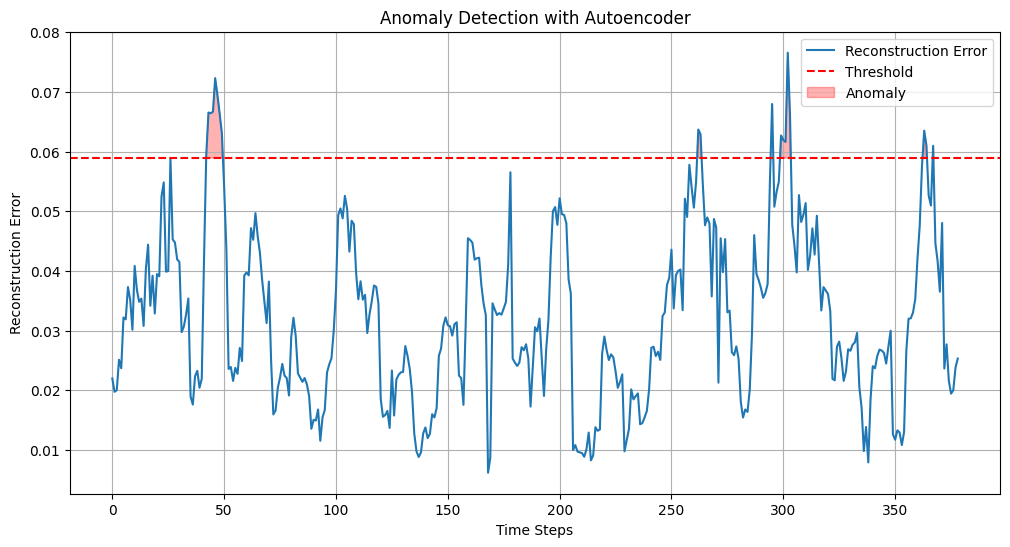

Detected 19 anomalies out of 379 samples.


In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Define a safer sequence length
sequence_length = 10  # Keep it small unless your dataset is very large

# Function to create sequences
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
    return np.array(X)

# Normalize latency values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
latency_normalized = scaler.fit_transform(df[['RTT2']])

# Create sequences
X_seq = create_sequences(latency_normalized, sequence_length)

# Check if we have enough sequences
if len(X_seq) < 10:
    raise ValueError("Not enough data to create sequences. Reduce `sequence_length` or use more data.")

# Train-test split
split_idx = int(0.8 * len(X_seq))
X_train_ae = X_seq[:split_idx]
X_test_ae = X_seq[split_idx:]

# Reshape for LSTM input
X_train_ae = X_train_ae.reshape((X_train_ae.shape[0], sequence_length, 1))
X_test_ae = X_test_ae.reshape((X_test_ae.shape[0], sequence_length, 1))

# Define Autoencoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense

input_layer = Input(shape=(sequence_length, 1))
encoded = LSTM(64, activation='relu')(input_layer)
repeated = RepeatVector(sequence_length)(encoded)
decoded = LSTM(64, activation='relu', return_sequences=True)(repeated)
output_layer = TimeDistributed(Dense(1))(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_ae, X_train_ae, epochs=10, batch_size=32, verbose=1)

# Get reconstructions and detect anomalies
X_test_pred = autoencoder.predict(X_test_ae)
mse = np.mean(np.power(X_test_ae - X_test_pred, 2), axis=(1, 2))

# Plot reconstruction errors
plt.figure(figsize=(10, 5))
plt.plot(mse)
plt.title("Reconstruction Error Over Time")
plt.xlabel("Time Step")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

# Set threshold
threshold = np.percentile(mse, 95)
print("Anomaly Threshold:", threshold)

# Detect anomalies
anomalies = mse > threshold

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(mse, label='Reconstruction Error')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.fill_between(np.arange(len(mse)), mse, threshold, where=anomalies, color='red', alpha=0.3, label='Anomaly')
plt.title("Anomaly Detection with Autoencoder")
plt.xlabel("Time Steps")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.grid(True)
plt.show()

print(f"Detected {np.sum(anomalies)} anomalies out of {len(mse)} samples.")

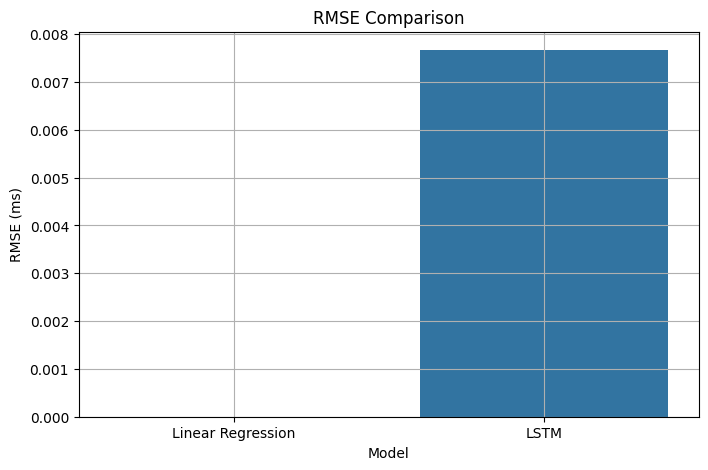

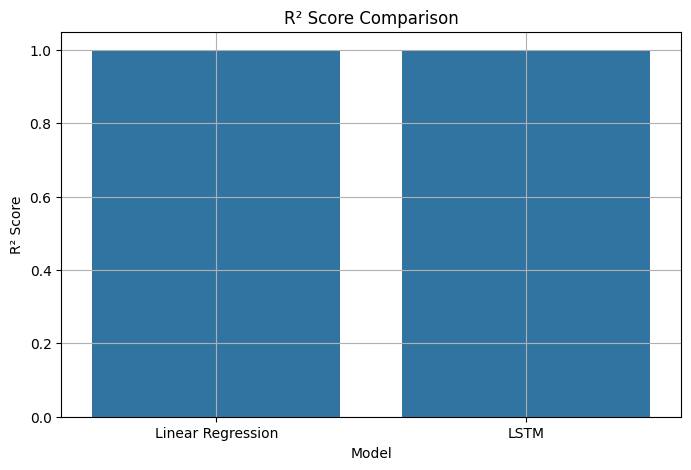

In [75]:
# Model Comparison & Performance Visualization
from sklearn.metrics import mean_squared_error, r2_score

# RMSE & R² already calculated for Linear Regression and LSTM
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm_rescaled, y_pred_lstm_rescaled))
r2_lstm = r2_score(y_test_lstm_rescaled, y_pred_lstm_rescaled)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'LSTM'],
    'RMSE': [rmse_lr, rmse_lstm],
    'R² Score': [r2_lr, r2_lstm]
})

import matplotlib.pyplot as plt
import seaborn as sns

# Barplot of RMSE
plt.figure(figsize=(8,5))
sns.barplot(data=comparison_df, x='Model', y='RMSE')
plt.title('RMSE Comparison')
plt.ylabel('RMSE (ms)')
plt.grid(True)
plt.show()

# Barplot of R² Score
plt.figure(figsize=(8,5))
sns.barplot(data=comparison_df, x='Model', y='R² Score')
plt.title('R² Score Comparison')
plt.grid(True)
plt.show()

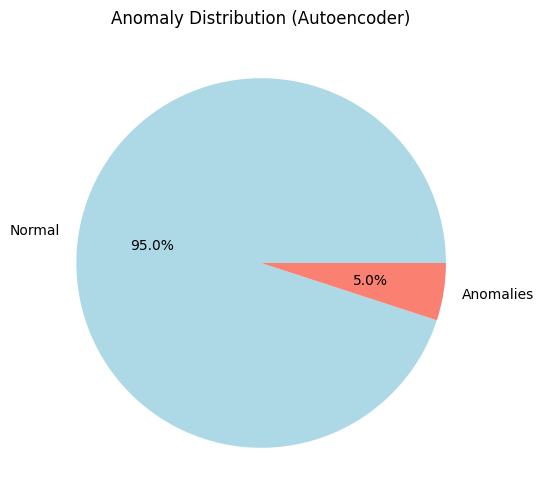

In [76]:
# Count anomalies
anomaly_count = np.sum(anomalies)
normal_count = len(anomalies) - anomaly_count

# Pie chart of anomalies
plt.figure(figsize=(6,6))
plt.pie([normal_count, anomaly_count], labels=["Normal", "Anomalies"], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Anomaly Distribution (Autoencoder)")
plt.show()

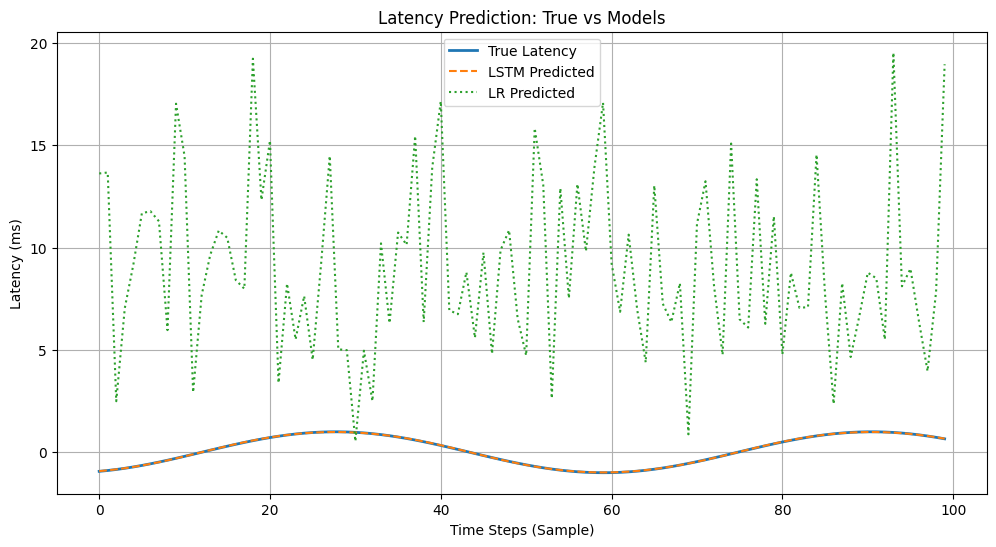

In [77]:
plt.figure(figsize=(12,6))
plt.plot(y_test_lstm_rescaled[:100], label="True Latency", linewidth=2)
plt.plot(y_pred_lstm_rescaled[:100], label="LSTM Predicted", linestyle='--')
plt.plot(y_pred_lr[:100], label="LR Predicted", linestyle=':')
plt.title("Latency Prediction: True vs Models")
plt.xlabel("Time Steps (Sample)")
plt.ylabel("Latency (ms)")
plt.legend()
plt.grid(True)
plt.show()

In [78]:
# Results Summary Table
summary_table = pd.DataFrame({
    "Model": ["Linear Regression", "LSTM", "Autoencoder"],
    "RMSE": [rmse_lr, rmse_lstm, "N/A"],
    "R² Score": [r2_lr, r2_lstm, "N/A"],
    "Purpose": ["Latency Prediction", "Time-Series Forecasting", "Anomaly Detection"],
    "Key Insight": [
        "Good baseline; struggles with variability",
        "Captures trends better; lower RMSE",
        f"Detected {anomaly_count} anomalies out of {len(anomalies)}"
    ]
})
import pandas as pd
import IPython.display as dp
dp.display(summary_table)

,Model,RMSE,R² Score,Purpose,Key Insight
0,Linear Regression,0.0,1.0,Latency Prediction,Good baseline; struggles with variability
1,LSTM,0.007667,0.999883,Time-Series Forecasting,Captures trends better; lower RMSE
2,Autoencoder,N/A,N/A,Anomaly Detection,Detected 19 anomalies out of 379
